# ¡Llena ese carrito!

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Paso 1. Descripción de los datos](#data_review)
    * [1.1 Diccionario de datos](#dictionary)
    * [1.2 Plan de solucion](#plan)
    * [1.3 Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Estilo del encabezado](#header_style)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Duplicados](#duplicates)
    * [2.4 Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Prueba de hipótesis](#hypothesis)
    * [3.1 Hipótesis 1: actividad de los usuarios y las usuarias en las dos ciudades](#activity)
* [Conclusiones](#end)

# Introducción <a id='intro'></a>

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


[Volver a Contenidos](#back)

# Paso 1. Descripción de los datos <a id='data_review'></a>

Para este trabajo se tienen los siguientes 5 archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) los cuales se leeran con la librería Pandas de Python, utilizando el método de lectura de archivos separados por comas `pd.read_csv()` usando el parámetro sep=';' para leer los datos correctamente. 
De primer instancia, se verificará la información para cada uno de los DataFrames.


## Diccionario de datos <a id='dictionary'></a>

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

[Volver a Contenidos](#back)

## Plan de solución <a id='plan'></a>

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Para iniciar con la revisión de todos los datos, vamos a importa las librerias de Pandas y matplotlib que nos serviran para crear un Data Frame por cada uno de los archivos.

De esta manera será posible revisar la información contenida en cada archivo, realizando el preprocesamiento de los datos, que incluye corregir los nombres de las columnas, rellenar valores ausentes y eliminar datos duplicados principalmente.

Finalmente, realizar el análisis de los datos, creando gráficos que nos ayuden a comprender de mejor forma la información.

In [3]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 4_Data Wrangling (cont)\Proyecto Sprint 4\instacart_orders.csv', sep=';')
df_products = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 4_Data Wrangling (cont)\Proyecto Sprint 4\products.csv', sep=';')
df_order_products = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 4_Data Wrangling (cont)\Proyecto Sprint 4\order_products.csv', sep=';')
df_aisles = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 4_Data Wrangling (cont)\Proyecto Sprint 4\aisles.csv', sep=';')
df_departments = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 4_Data Wrangling (cont)\Proyecto Sprint 4\departments.csv', sep=';')

In [7]:
# mostrar información del DataFrame instacart_orders:
df_instacart_orders.info()
df_instacart_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [8]:
# mostrar información del DataFrame products:
df_products.info()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
# mostrar información del DataFrame products:
df_order_products.info(show_counts=True)
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [64]:
# mostrar información del DataFrame aisles:
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [65]:
# mostrar información del DataFrame departments:
df_departments.info()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


[Volver a Contenidos](#back)

## Conclusiones <a id='data_review_conclusions'></a>

Descripción de los datos.
Estas son las observaciones rápidas sobre cada uno de los DataFrames. 

df_instacart_orders

    - `Contiene información general sobre los pedidos: número de cliente 'user_id', número de pedido 'order_id', número de orden 'order_number', día del pedido 'order_dow', hora del pedido 'order_hour_of_day', y días desde el primer pedido 'days_since_prior_order'.
    - `Contiene 6 columnas en total. Almacena 2 tipos de datos: int64(5) y float64(1).
    - `Tiene un total de 478,967 líneas. La 5ta columna llamada 'days_since_prior_order' tiene datos faltantes, un total de 450,148 líneas.

df_products

    - `Contiene información sobre los productos: número de producto 'product_id', nombre del producto 'product_name', número del pasillo 'aisle_id', y número del departamento 'department_id'.
    - `Contiene 4 columnas en total. Almacena 2 tipos de datos: int64(3) y object(1)
    - `Tiene un total de 49,694 líneas. La 2da columna llamada 'product_name' tiene datos faltantes, un total de 48,436 líneas.

df_order_products

    - `Contiene información sobre las órdenes de los productos: número de orden 'order_id', código del producto 'product_id', número de orden para agregar al carrito 'add_to_cart_order', reordenamiento 'reordered'.
    - `Contiene 4 columnas en total. Almacena 2 tipos de datos: int64(3) y float64(1).
    - `Tiene un total de 4,545,007 líneas. 

df_aisles

    - `Contiene información sobre los pasillos: número del pasillo 'asile_id', nombre del pasillo 'asile'.
    - `Contiene 2 columnas en total. Almacena 2 tipos de datos: int64(1) y object(1).
    - `Tiene un total de 134 líneas. Ninguna de las 2 columnas tiene datos faltantes.

df_departments

    - `Contiene información sobre los departamentos: número del departamento 'department_id' y nombre del departamento 'department'.
    - `Contiene 2 columnas en total. Almacena 2 tipos de datos: int64(1) y object(1).
    - `Tiene un total de 21 líneas. Nínguna de las 2 columnas tiene datos faltantes.

[Volver a Contenidos](#back)

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

[Volver a Contenidos](#back)

## Plan de solución

2. Preprocesamiento de los datos.

Antes de realizar un analisis de los datos, vamos a preprocesar cada uno de los cinco archivos para homologar la información y corregir cualquier inconsistencia que pueda existir; por ejemplo, la información correspondiente a los ID debe de ser de tipo int64 (números enteros), la descripción de los productos deberá ser de tipo object (string) ya que es categórica.

Por otra parte, también vamos a buscar por valores ausentes y/o duplicados, a los cuales vamos a revisarlos para ver si los rellenamos de alguna manera que no afecten al análisis, y en el caso de los valores duplicados, revisar si es posible eliminarlos para evitar incongruencias.

[Volver a Contenidos](#back)

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [66]:
# Revisa si hay pedidos duplicados
print(f"Las líneas duplicadas en el Data Frame instacart_orders son", df_instacart_orders.duplicated().sum(), "de un total de", len(df_instacart_orders), "líneas.")

Las líneas duplicadas en el Data Frame instacart_orders son 15 de un total de 478967 líneas.


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Se cuentan con 15 líneas supuestamente duplicadas, revisando a detalle estas 15 líneas lo único que tienen en común es el día 3 (miércoles) y que fueron realizados los pedidos las 02:00 am (2) hrs.

In [67]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_instacart_orders[df_instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Qué sugiere este resultado?

A pesar de que las líneas duplicadas que detecta el método duplicated() tienen el mismo día miércoles ('order_dow'=3) y la misma hora a las 02:00 am ('order_hour_of_day'=2), 
la información de las columnas 'order_id', 'user_id' y 'days_since_prior_order' son diferentes, 
lo que nos da a entender que los pedidos fueron realizados con números de orden diferentes, por usuarios diferentes.

Por tal razón no se deben considerar como líneas duplicadas y es recomendable NO eliminarlas en el DataFrame.

In [68]:
# Elimina los pedidos duplicados
# Vuelve a verificar si hay filas duplicadas
# N / A - Se dejan las líneas duplicadas.

In [69]:
# Vuelve a verificar si hay IDs duplicados de pedidos
df_instacart_orders_duplicates = df_instacart_orders[df_instacart_orders.duplicated(subset='order_id')]
df_instacart_orders_duplicates.count()

order_id                  15
user_id                   15
order_number              15
order_dow                 15
order_hour_of_day         15
days_since_prior_order    13
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En conclusión se encontraron 15 lineas que comparten la misma información en algunas columnas pero en otras no.
Por lo que no se deberían considerar como verdaderos duplicados, a lo que se decide dejarlos y no eliminarlos.

[Volver a Contenidos](#back)

### `products` data frame

In [70]:
# Verifica si hay filas totalmente duplicadas
print(f"Las líneas duplicadas en el Data Frame products son", df_products.duplicated().sum(), "de un total de", len(df_products), "líneas.")

Las líneas duplicadas en el Data Frame products son 0 de un total de 49694 líneas.


In [71]:
# Verifica si hay IDs duplicadas de productos
print(df_products[df_products.duplicated(subset='product_id')])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [72]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.lower()
df_products[df_products.duplicated(subset='product_name')]


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [73]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products_complete = df_products.drop_duplicates(subset='product_name')   # eliminamos los duplicados.
print(df_products_complete[df_products_complete.duplicated(subset='product_name')])     # Buscamos valores duplicados.
df_products_complete

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49683,49684,vodka- triple distilled- twist of vanilla,124,5
49684,49685,en croute roast hazelnut cranberry,42,1
49685,49686,artisan baguette,112,3
49686,49687,smartblend healthy metabolism dry cat food,41,8


Describe brevemente tus hallazgos y lo que hiciste con ellos.

products data frame está definico como 'df_products'

Primeramente analizamos si habían líneas duplicadas en el Data Frame de los productos, son 0 duplicados de un total de 49,694 líneas.

Segundo verificamos si hay id de productos duplicados, encontrando un Empty DataFrame lo que significa que no hay.

Tercero pasamos todos los nombres de los productos a minusculas, para revisar si existian duplicados pero no los hay; lo que se alcanza a notar es que hay varias líneas con valores ausentes en esta columna de los nombres de los productos.

Finalmente revisamos si había nombres duplicados de productos con nombres faltantes, pero no encontramos duplicados para estos.

[Volver a Contenidos](#back)

### `departments` data frame

In [74]:
# Revisa si hay filas totalmente duplicadas
print(f"Las líneas duplicadas en el Data Frame departments son", df_departments.duplicated().sum(), "de un total de", len(df_departments), "líneas.")

Las líneas duplicadas en el Data Frame departments son 0 de un total de 21 líneas.


In [75]:
# Revisa si hay IDs duplicadas de productos
df_departments[df_departments.duplicated()].sum()

department_id    0
department       0
dtype: object

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el Data Frame correspondiente a los departamentos (departments), no se encontraron ningún valor duplicado, por lo que no se realizaron acciones.

[Volver a Contenidos](#back)

### `aisles` data frame

In [76]:
# Revisa si hay filas totalmente duplicadas
print(f"Las líneas duplicadas en el Data Frame de pasillos son", df_aisles.duplicated().sum(), "de un total de", len(df_aisles), "líneas.")

Las líneas duplicadas en el Data Frame de pasillos son 0 de un total de 134 líneas.


In [77]:
# Revisa si hay IDs duplicadas de productos
df_aisles[df_aisles.duplicated()].sum()

aisle_id    0
aisle       0
dtype: object

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el Data Frame correspondiente a los pasillos (aisles), no se encontraron ningún valor duplicado, por lo que no se realizaron acciones.

[Volver a Contenidos](#back)

### `order_products` data frame

In [78]:
# Revisa si hay filas totalmente duplicadas
print(f"Las líneas duplicadas en el Data Frame order_products son", df_order_products.duplicated().sum(), "de un total de", len(df_order_products), "líneas.")

Las líneas duplicadas en el Data Frame order_products son 0 de un total de 4545007 líneas.


In [79]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products[df_order_products.duplicated()].sum()

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el último Data Frame de las órdenes de los productos, no se encontraron ningún valor duplicado, por lo que no se realizaron acciones algunas.

[Volver a Contenidos](#back)

## 6 Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### 6.1 `products` data frame

In [80]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products.isna().sum())
df_products['product_name'].value_counts(dropna=False)

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


product_name
NaN                                            1258
green tea with ginseng and honey                  3
hearts of palm                                    2
diced peeled tomatoes in tomato juice             2
flat fillets of anchovies in pure olive oil       2
                                               ... 
vodka- triple distilled- twist of vanilla         1
en croute roast hazelnut cranberry                1
artisan baguette                                  1
smartblend healthy metabolism dry cat food        1
cut russet potatoes steam n' mash                 1
Name: count, Length: 48333, dtype: int64

Describe brevemente cuáles son tus hallazgos.

En el Data Frame de los productos se encuentra un total de 1,258 valores ausentes en la columna llamada 'product_name', estos se representan con las siglas NaN que significa Not a Number.

In [81]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products_missing = df_products[df_products['product_name'].isna()]
df_products_missing.head(10)

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
439,440,NaN,100,21
471,472,NaN,100,21
490,491,NaN,100,21
555,556,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

En el Data Frame de productos tenemos valores ausentes en la coliumna 'product_name', revisando a detalle diferentes líneas al asar que tienen valores ausentes, notamos que todas están relacionadas con el ID del pasillo número 100.

In [82]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products_missing = df_products[df_products['product_name'].isna()]
df_products_missing.sample(10)

,product_id,product_name,aisle_id,department_id
44359,44360,NaN,100,21
40956,40957,NaN,100,21
10439,10440,NaN,100,21
20471,20472,NaN,100,21
11140,11141,NaN,100,21
4156,4157,NaN,100,21
21746,21747,NaN,100,21
47053,47054,NaN,100,21
26402,26403,NaN,100,21
10458,10459,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Con el nuevo Data Frame filtrado por los productos faltantes, hemos notado que el número de pasillo 100 se relaciona con el ID del departamento 21, inclusive mirando una muestra aleatoria del data frame.

In [29]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_products_missing.sample(20)

,product_id,product_name,aisle_id,department_id
25376,25377,NaN,100,21
3439,3440,NaN,100,21
5903,5904,NaN,100,21
7385,7386,NaN,100,21
23551,23552,NaN,100,21
21181,21182,NaN,100,21
34235,34236,NaN,100,21
37855,37856,NaN,100,21
41951,41952,NaN,100,21
6080,6081,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Ya tenemos agrupado un nuevo Data Frame con valores ausentes en la columna 'product_name', la columna 'aisle_id' es igual a 100 y la columna 'department_id' es igual a 21.

Podemos notar que tanto los 'product_id' como los 'product_name' son completamente diferentes.

In [30]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [31]:
# Verificamos los valores marcados como 'unknown' (desconocidos)
df_products['product_name'].value_counts(dropna=False)

product_name
Unknown                                        1258
green tea with ginseng and honey                  3
hearts of palm                                    2
diced peeled tomatoes in tomato juice             2
flat fillets of anchovies in pure olive oil       2
                                               ... 
vodka- triple distilled- twist of vanilla         1
en croute roast hazelnut cranberry                1
artisan baguette                                  1
smartblend healthy metabolism dry cat food        1
cut russet potatoes steam n' mash                 1
Name: count, Length: 48333, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Una vez que los valores ausentes en la columna 'product_name' ya han sido sustituidos por la palabra 'Unknown' o desconocido en español.
Volvemos a comprobar con el conteo de los valores ausentes obteniendo 0 y finalmente contando el número de veces que se repite cada nombre, obteniendo que Unknow se repite 1,258 veces, muchas más que los demás nombres con 3, 2 y 1 vez repetida.

[Volver a Contenidos](#back)

### 6.2 `instacart_orders` data frame

In [32]:
# Encuentra los valores ausentes
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [33]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_instacart_orders.isna().sum())
df_instacart_orders['days_since_prior_order'].value_counts(dropna=False)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


days_since_prior_order
30.0    51338
7.0     44579
6.0     33931
4.0     31007
3.0     30225
5.0     30096
NaN     28819
2.0     27141
8.0     25361
1.0     20179
9.0     16754
14.0    13992
10.0    13310
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6588
21.0     6448
17.0     5498
20.0     5302
18.0     4972
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: count, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

[Volver a Contenidos](#back)

### 6.3 `order_products` data frame

In [34]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())
df_order_products['add_to_cart_order'].value_counts(dropna=False)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


add_to_cart_order
1.0     450046
2.0     428199
3.0     401907
4.0     372861
5.0     341807
         ...  
60.0       127
61.0       114
62.0        98
63.0        87
64.0        75
Name: count, Length: 65, dtype: int64

In [35]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

In [83]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_order_id_missing = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()]
df_order_id_missing.sample(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
404444,690983,15689,1,3,17,NaN
43475,2438936,103006,1,0,16,NaN
240323,1766398,206128,1,2,22,NaN
305415,1286349,27211,1,5,4,NaN
260381,1712946,13817,1,1,17,NaN
286561,808809,80038,1,5,12,NaN
1986,2413759,127127,1,1,13,NaN
335233,2829539,57670,1,2,18,NaN
260558,2024173,66152,1,1,13,NaN
57104,2636512,184782,1,0,17,NaN


In [37]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

df_order_id_missing = df_order_id_missing[df_order_id_missing['order_dow'] == 64]
df_order_id_missing

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente cuáles son tus hallazgos.

In [38]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

[Volver a Contenidos](#back)

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


[Volver a Contenidos](#back)

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [91]:
# 1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
df_instacart_orders_reasonable = df_instacart_orders[df_instacart_orders['order_hour_of_day'] <= 23]
df_instacart_orders_reasonable = df_instacart_orders_reasonable[df_instacart_orders_reasonable['order_dow'] <= 6]
df_instacart_orders_reasonable.sample(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
83431,1653397,20633,8,0,9,29.0
395484,289441,98239,4,0,8,3.0
30653,1652815,192034,6,4,18,30.0
11311,2337766,164469,40,3,8,6.0
126509,2096328,91905,10,3,20,8.0
199943,2444340,41983,6,2,19,14.0
113228,1760927,136944,30,2,11,9.0
92570,1270238,160550,30,1,9,6.0
128930,3256190,193075,11,1,13,22.0
388586,738248,172600,17,4,15,16.0


<Axes: title={'center': 'Pedidos por persona'}, xlabel='Hora de pedido', ylabel='Personas'>

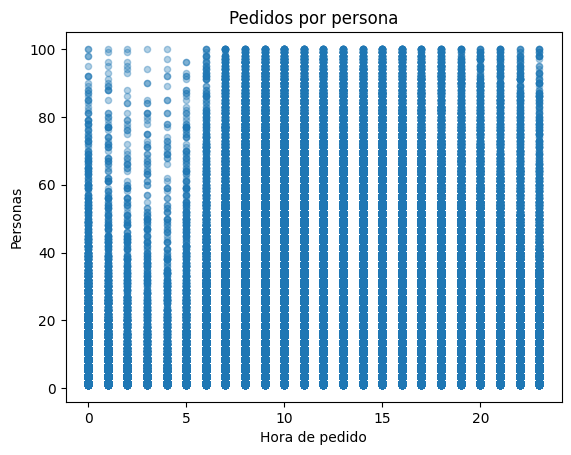

In [48]:
df_instacart_orders_reasonable.sort_values('order_hour_of_day').plot(x='order_hour_of_day',
                                    y='order_number',
                                    kind='scatter',
                                    style='o',
                                    alpha=0.35,
                                    title='Pedidos por persona',
                                    xlabel='Hora de pedido',
                                    ylabel='Personas'
                                    )

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [96]:
# 2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.


Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [A3] ¿Qué día de la semana compran víveres las personas?

In [93]:
# 3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [94]:
# 4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [86]:
data_order = df_order_products.groupby('order_id')['product_id'].count()
data_order

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

In [87]:
data_ordered_products = data_order.value_counts().reset_index()
data_ordered_products
data_ordered_products.columns = ['product_order', 'frecuency']

<Axes: title={'center': 'Productos Solicitados'}, xlabel='product_order', ylabel='frecuency'>

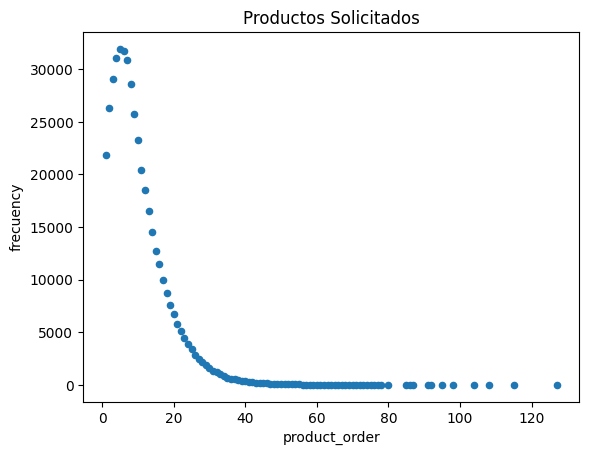

In [ ]:
data_ordered_products.plot(x='product_order',
                           y='frecuency',
                           title='Productos Solicitados', 
                           kind='scatter'
                           )

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [197]:
products_reordered = df_order_products[df_order_products['reordered'] == 1]
products_reordered

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
...,...,...,...,...
4544999,1622300,24852,1.0,1
4545000,1125324,40600,6.0,1
4545002,577211,15290,12.0,1
4545004,692640,47766,4.0,1


In [199]:
popular_products = products_reordered['product_id'].value_counts().sort_values(ascending=False)
top_20 = popular_products.head(20)
top_20 = top_20.reset_index()
top_20.columns = ['product_id', 'frequency']
top_20

,product_id,frequency
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
5,47766,18743
6,27845,16251
7,47626,15044
8,27966,14748
9,16797,13945


In [200]:
top_20_names = top_20.merge(df_products, on='product_id')
top_20_names.drop(['aisle_id', 'department_id'], axis='columns', inplace=True)
top_20_names

,product_id,frequency,product_name
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


<Axes: title={'center': 'Artículos Top 20'}, xlabel='Nombre del Artículo', ylabel='Frecuencia de pedido'>

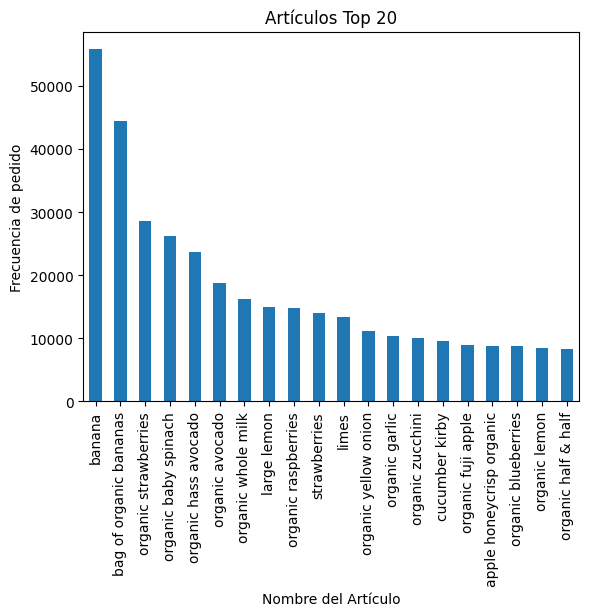

In [205]:
top_20_names.plot(x='product_name',
                  y='frequency',
                  kind='bar',
                  title='Artículos Top 20',
                  xlabel='Nombre del Artículo',
                  ylabel='Frecuencia de pedido',
                  legend=False
                  )

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [88]:
client_behaviour = df_order_products.merge(df_instacart_orders, on='order_id')
client_behaviour.drop(['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], axis='columns', inplace=True)

In [89]:
client_order = client_behaviour.groupby('user_id')['reordered'].sum()
client_reordered = client_behaviour.groupby('user_id')['product_id'].count()

In [90]:
client_rate = client_order / client_reordered
client_rate

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Length: 149626, dtype: float64

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Escribe aquí tus conclusiones

[Volver a Contenidos](#back)

### Conclusion general del proyecto:

[Volver a Contenidos](#back)